In [27]:
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
import pandas as pd

In [28]:
f_data = pd.read_csv('../data/tweets_final.csv')
f_data = f_data.iloc[0:500,:]
f_data.head(3)

,Datetime,Tweet Id,Text,Username
0,2022-06-17 23:59:41+00:00,1537948125628747777,@BitMartExchange To the Moon 💯💵💎\n@galuka156 @...,cozyhomes88
1,2022-06-17 23:59:27+00:00,1537948068431007744,THIS!!!....@metazooxyz with @MrSweMusic1...RIG...,TTJP_1
2,2022-06-17 23:59:02+00:00,1537947961983832066,In #Mars4 #game demo you can free your imagina...,Dubai_community


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True)
# under the hood - lowercasing,removing special chars,removing stop words
input_matrix = vectorizer.fit_transform(f_data.Text).todense()

In [30]:
from sklearn.decomposition import NMF
NMF_model = NMF(n_components=4, random_state=1)
W = NMF_model.fit_transform(input_matrix)
H = NMF_model.components_

/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


In [31]:
topic_word_list = []
def get_topics(components):
    for i, comp in enumerate(components):
        terms_comp = zip(vocab,comp)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
        topic=" "
        for t in sorted_terms:
            topic= topic + ' ' + t[0]
        topic_word_list.append(topic)
    return topic_word_list
get_topics(H)

['  otherdeed mayc otherside ape whaleanalytica bayc bought',
 '  https metaverse nft nfts mintable meta crypto',
 '  atahannft connnft gamer_network_ gamersassembly golegends metalegendsnft monsterdonuts_',
 '  smartchain 99 sold 38 weaselz crypto nft']

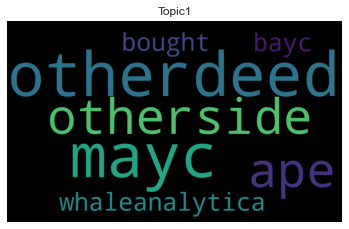

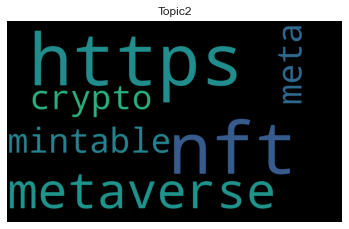

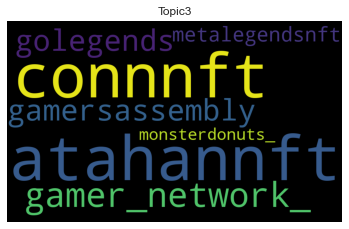

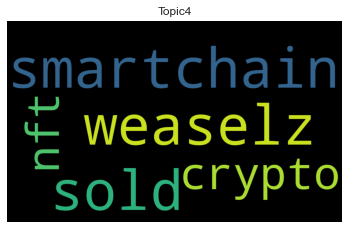

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for i in range(4):
  wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topic_word_list[i])
  plt.imshow(wc)
  plt.title(f"Topic{i+1}")
  plt.axis("off")
  plt.show()